In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv('../input/nlp-getting-started/train.csv')
test = pd.read_csv('../input/nlp-getting-started/test.csv')

In [3]:
train.shape,test.shape

((7613, 5), (3263, 4))

In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


<AxesSubplot:xlabel='target', ylabel='count'>

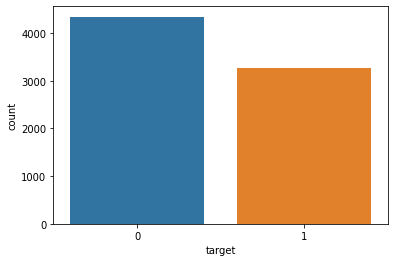

In [6]:
sns.countplot(x='target',data = train)

In [7]:
y = train.target
X = train.text

In [8]:
X

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [9]:
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
import spacy

In [10]:
nlp = spacy.load('en_core_web_sm')
def preprocess(text):
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc]
    a_lemmas = [lemma.lower() for lemma in lemmas if lemma.isalpha() and lemma not in stopwords.words('english')]
    lemmatized_text = ' '.join(a_lemmas)
    return lemmatized_text

In [11]:
df_train = pd.DataFrame([])
cleaned_text = []
for text in X:
    cleaned_text.append(preprocess(text))
df_train['text'] = cleaned_text

In [12]:
df_train

,text
0,deed reason earthquake may allah forgive
1,forest fire near la ronge sask canada
2,resident ask shelter place notify officer evac...
3,people receive wildfire evacuation order calif...
4,get send photo ruby alaska smoke wildfire pour...
...,...
7608,two giant crane hold bridge collapse nearby home
7609,control wild fire california even northern par...
7610,km s volcano hawaii
7611,police investigate e bike collide car little p...


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(df_train,y,test_size = 0.3,random_state = 42)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
vect = CountVectorizer(max_features = 350)

In [17]:
X_train_bow = vect.fit_transform(X_train['text'].tolist())
X_test_bow = vect.transform(X_test['text'].tolist())

In [18]:
from sklearn.naive_bayes import MultinomialNB

In [19]:
clf = MultinomialNB()

In [20]:
clf.fit(X_train_bow,y_train)

MultinomialNB()

In [21]:
pred = clf.predict(X_test_bow)

In [22]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [23]:
print("Accuracy:{:.3f}".format(accuracy_score(y_test,pred)))

Accuracy:0.743


In [24]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79      1318
           1       0.74      0.61      0.67       966

    accuracy                           0.74      2284
   macro avg       0.74      0.72      0.73      2284
weighted avg       0.74      0.74      0.74      2284



In [25]:
print(confusion_matrix(y_test,pred))

[[1110  208]
 [ 379  587]]
